# Исследование поведения пользователей сервиса аренды самокатов

## Цели проекта 
Проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

## Основные шаги
* Провести предварительный анализ использования тарифов на выборке клиентов сервиса самокатов
* Проанализировать поведение клиентов при использовании услуг. 
* Провести предобработку данных, их анализ. 
* Проверить статистические гипотезы на основе имеющихся данных.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as st

##  Загрузка данных

In [2]:
users = pd.read_csv('C:/Users/dima/Downloads/users_go.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
users.head(20)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [6]:
rides = pd.read_csv('C:/Users/dima/Downloads/rides_go.csv')

In [7]:
rides.head(20)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [8]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [9]:
subscriptions = pd.read_csv('C:/Users/dima/Downloads/subscriptions_go.csv')

In [10]:
subscriptions.head(20)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [11]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


В данном задании у нас есть три датафрема с информацией о пользователях и подписках. 
В первом датафрейме представлены данные общие данные о пользователях, такие как имя, возраст, город, тип подписки.
Во втором датафрейме представлены данные о расстоянии, продолжительности и дате поездки.
В третьем датафрейме информация о подписках: цена минуты, стартовая цена, и стоимость месячной подписки.
Вызвав метод инфо, можно обратить внимание, что пропущенных значений в данных нет, во втором датафрейме нужно поменять тип данных в столбце data на datatime. Нужно будет просмотреть информацию по дубликатам, аномальным значениям.

## Предобработка данных

### Приводим значение к типу datetime

In [12]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

In [13]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [14]:
rides['number_month'] = rides['date'].dt.month

In [15]:
rides.head(5)

,user_id,distance,duration,date,number_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


## Проверим наличие пропущенных значений и дубликатов

### Поиск пропущенных значений

In [16]:
users.isna().sum() #пропущенные значения в датафрейме users отсутствуют

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [17]:
rides.isna().sum() #пропущенные значения в датафрейме rides отсутствуют

user_id         0
distance        0
duration        0
date            0
number_month    0
dtype: int64

In [18]:
subscriptions.isna().sum() #пропущенные значения в датафрейме subscriptions отсутствуют

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

### Поиск дубликатов

In [19]:
users.duplicated().sum() #в датафрейме users нашлось 31 строк-дубликатов, удалим их


31

In [20]:
users = users.drop_duplicates().reset_index(drop = True)

In [21]:
users.duplicated().sum() 

0

In [22]:
users['name'].sort_values(ascending = True).unique() #проверим столбцы а наличие неявных дубликатов

array(['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра',
       'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина',
       'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий',
       'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина',
       'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём',
       'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия',
       'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника',
       'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад',
       'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод',
       'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей',
       'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила',
       'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий',
       'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена',
       'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар',
       'Злата', 

In [23]:
users['city'].sort_values(ascending = True).unique()

array(['Екатеринбург', 'Краснодар', 'Москва', 'Омск', 'Пятигорск',
       'Ростов-на-Дону', 'Сочи', 'Тюмень'], dtype=object)

In [24]:
users['age'].unique()

array([22, 31, 20, 26, 28, 25, 23, 21, 18, 27, 24, 29, 32, 14, 19, 30, 17,
       12, 35, 33, 13, 15, 37, 16, 34, 38, 36, 39, 43], dtype=int64)

In [25]:
users['subscription_type'].unique() #в датафрейме users явные дубликаты не выявлены

array(['ultra', 'free'], dtype=object)

In [26]:
rides.duplicated().sum() #в датафрейме rides отсутствуют строки-дубликаты

0

In [27]:
subscriptions.duplicated().sum() #в датафрейме subscriptions отсутствуют строки-дубликаты

0

В данном разделе изменили тип данных в столбце data датафрейма rides на datatime. Добавили по заданию новый столбец, который будет выводить номер месяца каждой поездки. Убедились в том, что у нас в датафреймах нет пропущенных значений. Следующим шагом произведем поиск дубликатов. В users нашли 31 дубликат, удалим их и перезапишем датафрейм. В остальных датафреймах нет строк-дубликатов. Так же посмотрим уникальные значения в столбцах, чтобы выявить аномалии, которых в последующем не обнаружили. 

## Исследовательский анализ данных

### Частота встречаемости городов

In [28]:
users['city'].describe()

count          1534
unique            8
top       Пятигорск
freq            219
Name: city, dtype: object

In [29]:
users_city = users.groupby('city')['city'].count().sort_values(ascending = True)
display(users_city)

city
Москва            168
Тюмень            180
Омск              183
Сочи              189
Краснодар         193
Ростов-на-Дону    198
Екатеринбург      204
Пятигорск         219
Name: city, dtype: int64

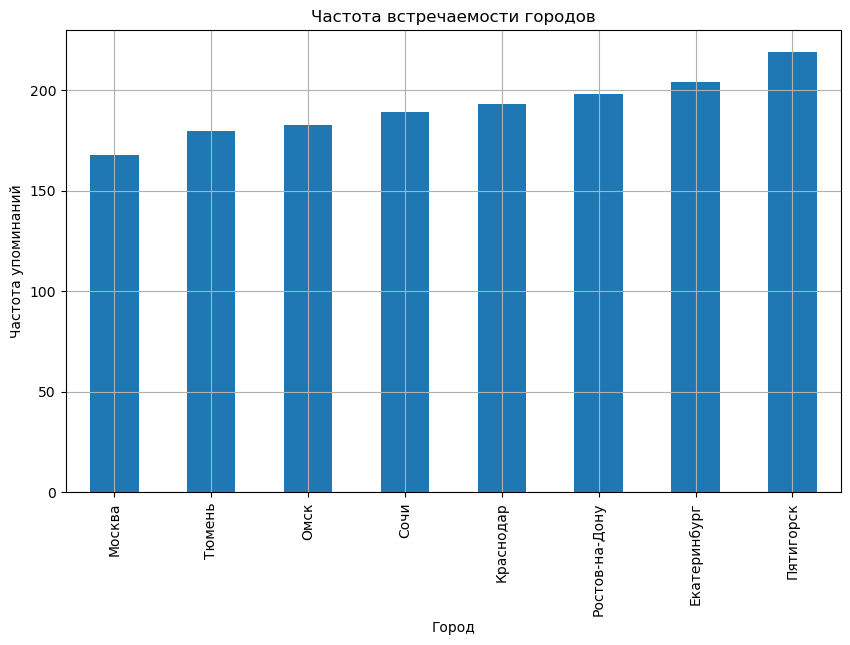

In [30]:
users_city.plot(x='city', kind='bar', figsize=(10, 6), grid=True, title ='Частота встречаемости городов')
plt.xlabel('Город')
plt.ylabel('Частота упоминаний');

Графику видно, что самый часто встречаемый город - Пятигорск(219 записей). После него идет Екатеринбург. Меньше всего записей приходится на Москву(168).

### Соотношение пользователей с подпиской и без подписки

In [31]:
ratio_users = users.copy()

ratio = ratio_users.pivot_table(index='subscription_type', values='user_id', aggfunc=['count'])
ratio.columns = ['count_users_sub']
ratio['sum_users_sub']= ratio['count_users_sub'].sum()
ratio['shape'] = round((ratio['count_users_sub']/ratio['sum_users_sub'])*100, 1)
ratio.columns =['Количество пользователей', 'Всего пользователей', 'Доля пользователей от общего']
display(ratio)

,Количество пользователей,Всего пользователей,Доля пользователей от общего
subscription_type,,,
free,835,1534,54.4
ultra,699,1534,45.6


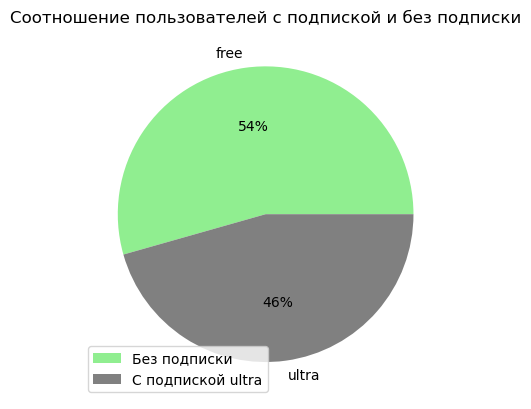

In [32]:
ratio.plot(kind='pie', y='Доля пользователей от общего', autopct='%1.0f%%', colors = ['lightgreen','grey'], 
           title='Соотношение пользователей с подпиской и без подписки');
plt.legend(['Без подписки', 'С подпиской ultra'])
plt.ylabel('');


По диаграмме видно, что разница между пользователями с подпиской и без не так значительна. 54% без подписки и с подпиской 46%, но все равно, больще пользователей, которые не пользуются подпиской.

### Возраст пользователей

In [33]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [34]:
users_age = users.pivot_table(index= 'age', values='user_id', aggfunc= 'count')
users_age = users_age.reset_index()
users_age.columns =['Возраст пользователей', 'Количество пользователей']
display(users_age)

,Возраст пользователей,Количество пользователей
0,12,4
1,13,8
2,14,9
3,15,13
4,16,19
5,17,26
6,18,46
7,19,47
8,20,71
9,21,93


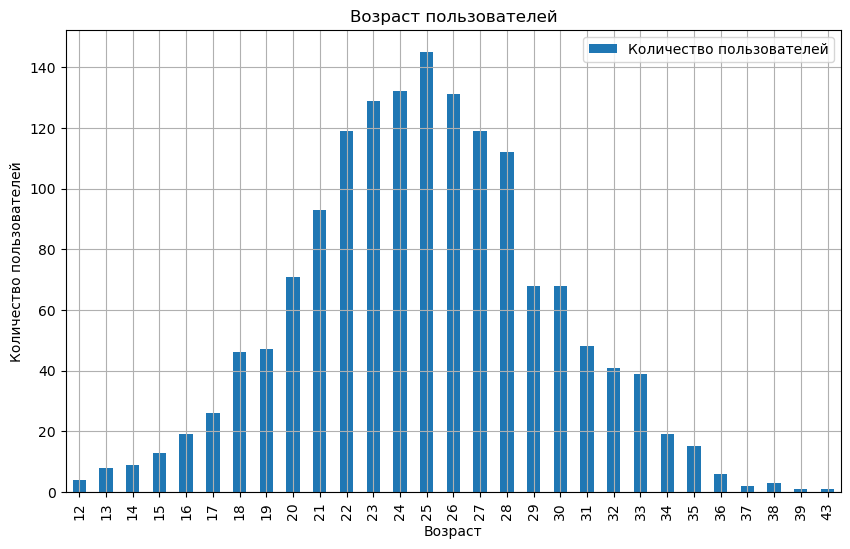

In [35]:
users_age.plot(x='Возраст пользователей', y='Количество пользователей', kind='bar', figsize=(10, 6), grid=True, title ='Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей');

Большинство пользователей приходится на возврастную группу от 22 до 28 лет. Так же это видно и по среднему, оно составяет около 25 лет. Самым молодым пользователям - 12 лет, а самым взрослым - 43 года.

###  Расстояние, которое пользователь преодолел за одну поездку

In [36]:
rides['distance'] = round(rides['distance'], 1) #округлим значение в солбце distance до 1 знака после запятой
display(rides.head(10))

,user_id,distance,duration,date,number_month
0,1,4409.9,25.599769,2021-01-01,1
1,1,2617.6,15.816871,2021-01-18,1
2,1,754.2,6.232113,2021-04-20,4
3,1,2694.8,18.511000,2021-08-11,8
4,1,4028.7,26.265803,2021-08-28,8
5,1,2770.9,16.650138,2021-10-09,10
6,1,3039.0,14.927879,2021-10-19,10
7,1,2842.1,23.117468,2021-11-06,11
8,1,3412.7,15.238072,2021-11-14,11
9,1,748.7,15.041884,2021-11-22,11


In [37]:
rides['distance'].describe()

count    18068.000000
mean      3070.659841
std       1116.831106
min          0.900000
25%       2543.200000
50%       3133.600000
75%       3776.225000
max       7211.000000
Name: distance, dtype: float64

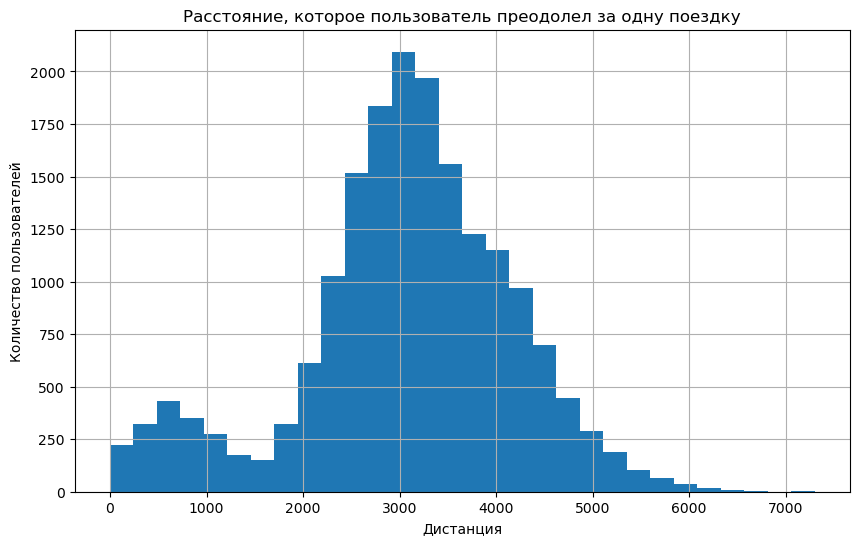

In [38]:
rides['distance'].hist(bins= 30, figsize=(10, 6), range=(0, 7300), grid=True)
plt.xlabel('Дистанция')
plt.ylabel('Количество пользователей')
plt.title('Расстояние, которое пользователь преодолел за одну поездку');

Большенство значений лежит в промежутке от 2500 до 3500 метров. Более 6000 метров встречается очень редко. Из чего можно сделать вывод, что очень редко самокаты используют на большие расстояния.

### Продолжительность поездки

In [39]:
rides['duration'] = np.ceil(rides['duration']) #округлим значение в столбце distance
display(rides.head(10))

,user_id,distance,duration,date,number_month
0,1,4409.9,26.0,2021-01-01,1
1,1,2617.6,16.0,2021-01-18,1
2,1,754.2,7.0,2021-04-20,4
3,1,2694.8,19.0,2021-08-11,8
4,1,4028.7,27.0,2021-08-28,8
5,1,2770.9,17.0,2021-10-09,10
6,1,3039.0,15.0,2021-10-19,10
7,1,2842.1,24.0,2021-11-06,11
8,1,3412.7,16.0,2021-11-14,11
9,1,748.7,16.0,2021-11-22,11


In [40]:
rides['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

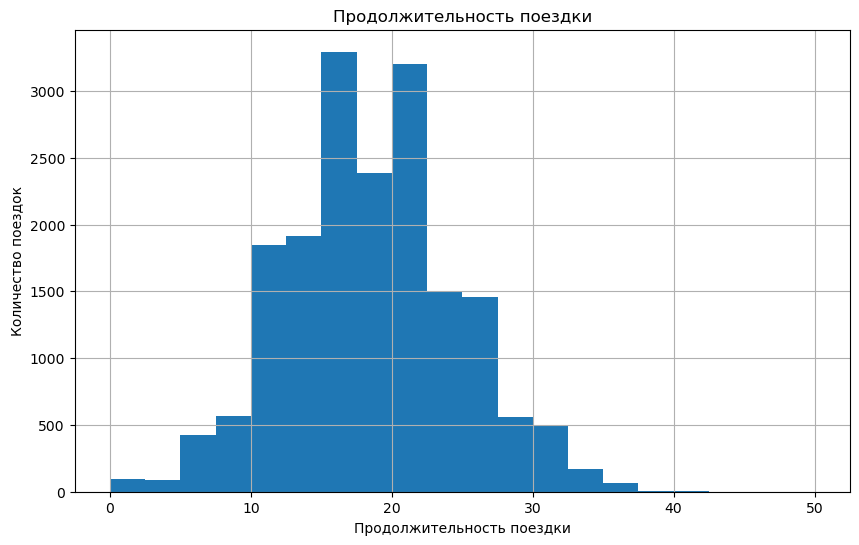

In [41]:
rides['duration'].hist(bins= 20, figsize=(10, 6), range=(0, 50), grid=True)
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.title('Продолжительность поездки');

В столбце duration в промежутке от 15 до 20 минут находится самое большое количество значений. Поездки продолжительностью больше 40 минут встречаются очень редко.

Вывод: Построили график частоты встречаемости городов, график с возрастом пользователей. Постороили круговую диаграмму для пользователей с подпиской и без. Как мы увидели из предыдущих гистограмм, большинство значений имеют нормальное распределение, что для нас является хорошим знаком. 

## Объединение данных

### Объединим данные о пользователях, поездках и подписках в один датафрейм. 

In [42]:

users_rides = users.merge(rides, on='user_id', how='outer') #объединим сначала датафреймы users и rides по столбцу user_id и сохраним в переменную users_rides

total_data = users_rides.merge(subscriptions, on='subscription_type', how='right') #после чего, полученный датафрейм users_rides с датафреймом subscriptions по столбцу subscription_type 
display(total_data.head(20))


,user_id,name,age,city,subscription_type,distance,duration,date,number_month,minute_price,start_ride_price,subscription_fee
0,700,Айдар,22,Омск,free,2515.7,15.0,2021-01-02,1,8,50,0
1,700,Айдар,22,Омск,free,846.9,17.0,2021-02-01,2,8,50,0
2,700,Айдар,22,Омск,free,4004.4,21.0,2021-02-04,2,8,50,0
3,700,Айдар,22,Омск,free,1205.9,10.0,2021-02-10,2,8,50,0
4,700,Айдар,22,Омск,free,3047.4,18.0,2021-02-14,2,8,50,0
5,700,Айдар,22,Омск,free,4342.0,23.0,2021-02-23,2,8,50,0
6,700,Айдар,22,Омск,free,3798.3,19.0,2021-03-03,3,8,50,0
7,700,Айдар,22,Омск,free,2984.6,16.0,2021-04-09,4,8,50,0
8,700,Айдар,22,Омск,free,3360.1,17.0,2021-06-12,6,8,50,0
9,700,Айдар,22,Омск,free,2567.5,12.0,2021-06-23,6,8,50,0


### Создание датафрейма c данными о пользователях без подписки

In [43]:
free = total_data.query('subscription_type == "free"') #c помощью метода query выберем по столбцу subscription_type строки со значением free и сохраним в новый датафрейм
display(free.head(10))

,user_id,name,age,city,subscription_type,distance,duration,date,number_month,minute_price,start_ride_price,subscription_fee
0,700,Айдар,22,Омск,free,2515.7,15.0,2021-01-02,1,8,50,0
1,700,Айдар,22,Омск,free,846.9,17.0,2021-02-01,2,8,50,0
2,700,Айдар,22,Омск,free,4004.4,21.0,2021-02-04,2,8,50,0
3,700,Айдар,22,Омск,free,1205.9,10.0,2021-02-10,2,8,50,0
4,700,Айдар,22,Омск,free,3047.4,18.0,2021-02-14,2,8,50,0
5,700,Айдар,22,Омск,free,4342.0,23.0,2021-02-23,2,8,50,0
6,700,Айдар,22,Омск,free,3798.3,19.0,2021-03-03,3,8,50,0
7,700,Айдар,22,Омск,free,2984.6,16.0,2021-04-09,4,8,50,0
8,700,Айдар,22,Омск,free,3360.1,17.0,2021-06-12,6,8,50,0
9,700,Айдар,22,Омск,free,2567.5,12.0,2021-06-23,6,8,50,0


### Создание датафрейма c данными о пользователях с подпиской ultra

In [44]:
ultra = total_data.query('subscription_type == "ultra"') #c помощью метода query выберем по столбцу subscription_type строки со значением ultra и сохраним в новый датафрейм
display(ultra.head())
ultra.info()

,user_id,name,age,city,subscription_type,distance,duration,date,number_month,minute_price,start_ride_price,subscription_fee
11568,1,Кира,22,Тюмень,ultra,4409.9,26.0,2021-01-01,1,6,0,199
11569,1,Кира,22,Тюмень,ultra,2617.6,16.0,2021-01-18,1,6,0,199
11570,1,Кира,22,Тюмень,ultra,754.2,7.0,2021-04-20,4,6,0,199
11571,1,Кира,22,Тюмень,ultra,2694.8,19.0,2021-08-11,8,6,0,199
11572,1,Кира,22,Тюмень,ultra,4028.7,27.0,2021-08-28,8,6,0,199


<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, 11568 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   number_month       6500 non-null   int32         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 634.8+ KB


Выполнили объединение данных в датафреймах при помощи метода merge, по общим столбцам, для выполнения дальнейшего анализа.

## Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

### Расстояние поездок для пользователей без подписки

In [45]:
free['distance'].describe()

count    11568.000000
mean      3045.495297
std       1246.173747
min          0.900000
25%       2366.600000
50%       3114.650000
75%       3905.700000
max       7211.000000
Name: distance, dtype: float64

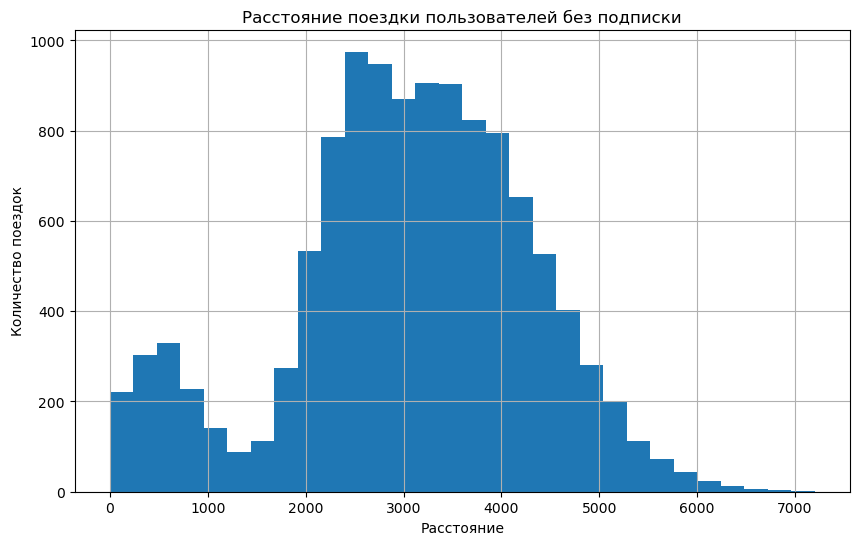

In [46]:
free['distance'].hist(bins= 30, figsize=(10, 6), range=(0, 7200), grid=True)
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.title('Расстояние поездки пользователей без подписки');

Большенство значений лежит в промежутке от 2500 до 4000 метров. Более 6000 метров встречается очень редко.

### Время поездок для пользователей без подписки

In [47]:
free['duration'].describe()

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

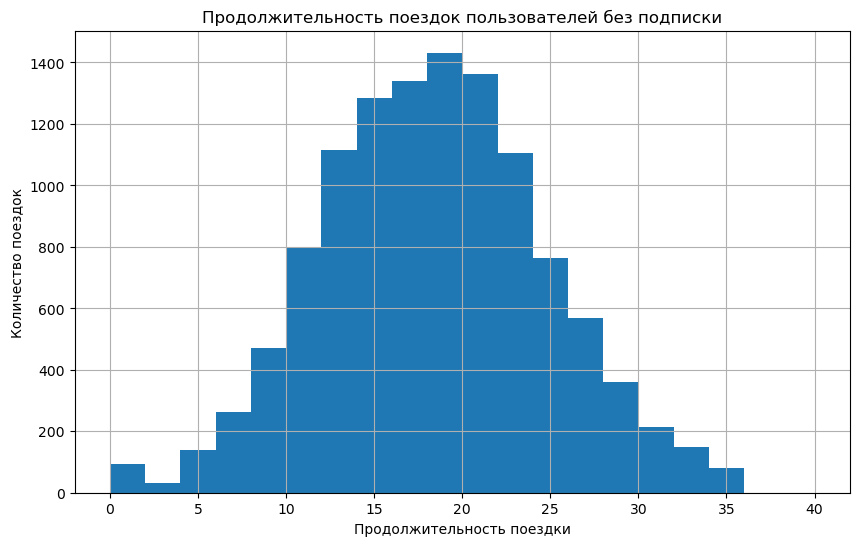

In [48]:
free['duration'].hist(bins= 20, figsize=(10, 6), range=(0, 40), grid=True)
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.title('Продолжительность поездок пользователей без подписки');

Больше всего значений лежит в промежутке от 12 до 24 минут. Значения после 35 минут отсутствуют.

### Расстояние поездок для пользователей с подпиской ultra

In [49]:
ultra['distance'].describe()

count    6500.000000
mean     3115.444985
std       836.895127
min       244.200000
25%      2785.400000
50%      3148.600000
75%      3560.600000
max      5699.800000
Name: distance, dtype: float64

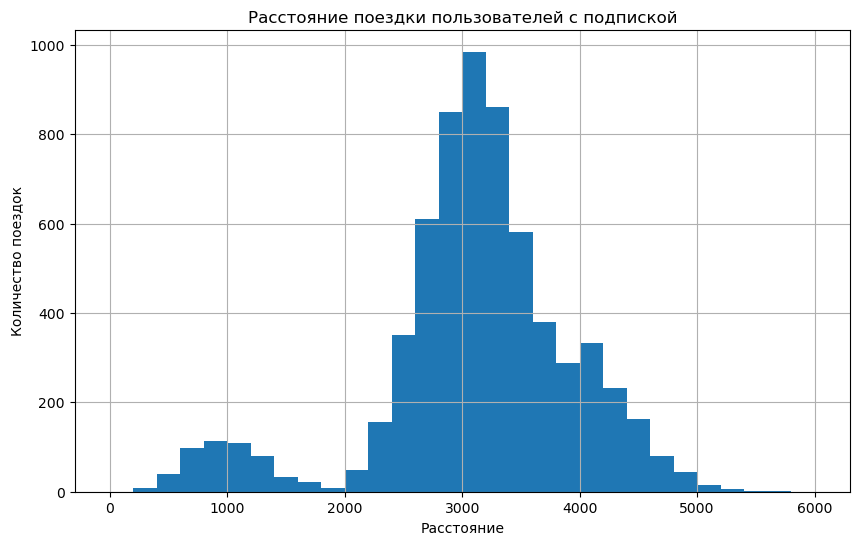

In [50]:
ultra['distance'].hist(bins= 30, figsize=(10, 6), range=(0, 6000), grid=True)
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.title('Расстояние поездки пользователей с подпиской');

В основном все данные распределены от 2000 до 5000 метров. Большенство значений лежит в промежутке от 2800 до 3400 метров. Но есть небольшой всплеск значений на промеутке от 600 до 1200 метров.

### Время поездок для пользователей с подпиской ultra

In [51]:
ultra['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

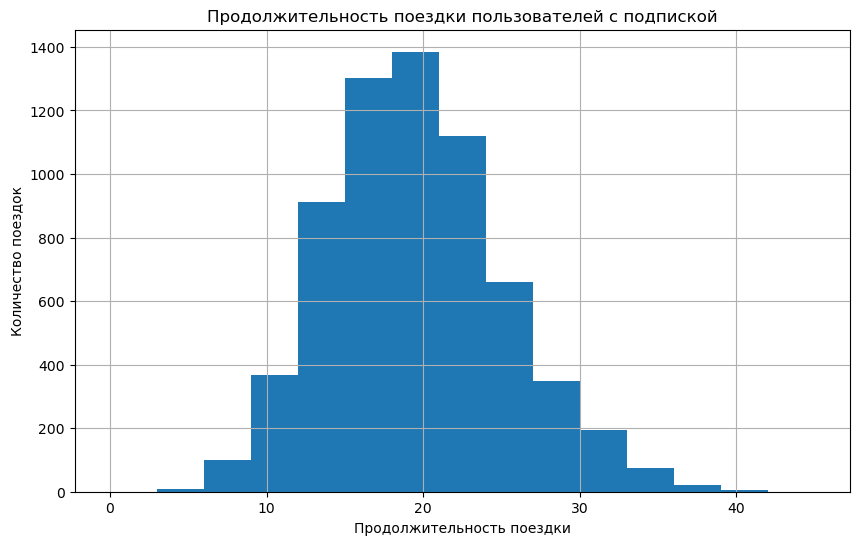

In [52]:
ultra['duration'].hist(bins= 15, figsize=(10, 6), range=(0, 45), grid=True)
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.title('Продолжительность поездки пользователей с подпиской');

Данные распределены нормально. Большенство значений в промежутке от 15 до 23 минут. До 7 минут и после 40 минту данные практически отсутсвуют. В этом есть небольшое отличие от продолжительности поездки пользователей без подписки.

Вывод: Объединили данные о пользователях, поездках и подписках с помощью метода merge в один датафрейм по общим столбцам. Создали на основании нового датафрейма два новых: датафрейм c данными о пользователях без подписки, датафрейм c данными о пользователях подпиской ultra. Визуализировали при помощи гистограмминформацию о расстоянии и времени поездок для пользователей обеих категорий.

## Подсчёт выручки

### Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц

In [53]:
data_user_month = total_data.groupby(['user_id', 'number_month']).agg({'distance': 'sum', 'duration': 'sum', 'user_id': 'count', 'subscription_type': 'first', 'minute_price': 'first', 'start_ride_price': 'first', 'subscription_fee': 'first'})
data_user_month.columns =['distance_sum', 'duration_sum', 'rides_month', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee']
display(data_user_month)

distance_sum  duration_sum  rides_month  \
user_id number_month                                            
1       1                   7027.5          42.0            2   
        4                    754.2           7.0            1   
        8                   6723.5          46.0            2   
        10                  5809.9          32.0            2   
        11                  7003.5          56.0            3   
...                            ...           ...          ...   
1534    6                   3409.4          26.0            2   
        8                   7622.4          48.0            2   
        9                   4928.2          23.0            1   
        11                 13350.0          78.0            4   
        12                  2371.7          16.0            1   

                     subscription_type  minute_price  start_ride_price  \
user_id number_month                                                     
1       1                        ultra             6                 0   
        4                        ultra             6                 0   
        8                        ultra             6                 0   
        10                       ultra             6                 0   
        11                       ultra             6                 0   
...                                ...           ...               ...   
1534    6                         free             8                50   
        8                         free             8                50   
        9                         free             8                50   
        11                        free             8                50   
        12                        free             8                50   

                      subscription_fee  
user_id number_month                    
1       1                          199  
        4                          199  
        8                          199  
        10                         199  
        11                         199  
...                                ...  
1534    6                            0  
        8                            0  
        9                            0  
        11                           0  
        12                           0  

[11331 rows x 7 columns]

### Расчет помесячной выручки

Помесячная выручка считается по формуле: стоимость старта поездки ×  количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

In [54]:
#создадим функцию, которая будет считать выручку, которую пользователь принес за каждый месяц
def income_month(row):
    if row['subscription_type'] == 'ultra':
        return (row['duration_sum']*6)+199
    elif row['subscription_type'] == 'free':
        return 50*row['rides_month']+8*row['duration_sum']
#в нам датафрейм добавим столбец income_month с результатом работы функции     
data_user_month['income_month'] = data_user_month[['rides_month', 'duration_sum', 'subscription_type']].apply(income_month, axis=1)
display(data_user_month.head())

distance_sum  duration_sum  rides_month  \
user_id number_month                                            
1       1                   7027.5          42.0            2   
        4                    754.2           7.0            1   
        8                   6723.5          46.0            2   
        10                  5809.9          32.0            2   
        11                  7003.5          56.0            3   

                     subscription_type  minute_price  start_ride_price  \
user_id number_month                                                     
1       1                        ultra             6                 0   
        4                        ultra             6                 0   
        8                        ultra             6                 0   
        10                       ultra             6                 0   
        11                       ultra             6                 0   

                      subscription_fee  income_month  
user_id number_month                                  
1       1                          199         451.0  
        4                          199         241.0  
        8                          199         475.0  
        10                         199         391.0  
        11                         199         535.0

Вывод: Найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц и добавили эти значения в наш объединенный датафрейм. После чего, по формуле посчитали функцию при помощи функции и добавили к новый столбец с результатами расчетов. 

## Проверка гипотез

### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки

Нулевая гипотеза: пользователи с подпиской тратят равное количество времени на поездки, что и пользователи без подписки.
Альтернативная гипотеза: пользователи с подпиской тратят больше времени на поездки.

In [55]:
free['duration'].mean()

17.890992392807746

In [56]:
ultra['duration'].mean()

19.037692307692307

In [57]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(ultra['duration'], free['duration'], alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


Получили значение уровня статистической значимости больше значения pvalue, поэтому отвергаем нулевую гипотезу. Это может означать, что пользователи с подпиской тратят больше времени на поездку.

### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской не превышает 3130 метров.
Альтернативная гипотеза: среднее расстояние, которое проезжают пользователи с подпиской больше 3130 метров.

In [58]:
ultra['distance'].mean() #выведем среднее расстояние, которое проезжают пользователи с подпиской

3115.4449846153843

In [59]:
interested_value = 3130 # оптимальное расстояние с точки зрения износа самоката

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(ultra['distance'], interested_value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195427368335852
Не получилось отвергнуть нулевую гипотезу


Получилось, что значение pvalue гораздо больше уровня статистической значимости, поэтому гипотеза о том, что пользователи с подпиской проезжают расстояние равное 3130 метров не может быть отвергнута. Даже если это значение окажется меньше, мы не сможем отвергнуть нулевую гипотезу.

### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Нулевая гипотеза: помесячная выручка от пользователей с подпиской по месяцам равна выручке пользователей без подписки
Альтернативная гипотеза: помесячная выручка от пользователей с подпиской по месяцам больше, чем выручка от пользователей без подписки

In [60]:
user_ultra = data_user_month.query('subscription_type == "ultra"')
pivot_user_ultra = user_ultra.pivot_table(index=['user_id', 'number_month'], values='income_month', aggfunc='sum')

display(pivot_user_ultra)

income_month
user_id number_month              
1       1                    451.0
        4                    241.0
        8                    475.0
        10                   391.0
        11                   535.0
...                            ...
699     6                    301.0
        8                    469.0
        9                    385.0
        10                   295.0
        12                   355.0

[4533 rows x 1 columns]

In [61]:
user_free = data_user_month.query('subscription_type == "free"')
pivot_user_free = user_free.pivot_table(index=['user_id', 'number_month'], values='income_month', aggfunc='sum')

display(pivot_user_free)

income_month
user_id number_month              
700     1                    170.0
        2                    962.0
        3                    202.0
        4                    178.0
        6                    332.0
...                            ...
1534    6                    308.0
        8                    484.0
        9                    234.0
        11                   824.0
        12                   178.0

[6798 rows x 1 columns]

In [62]:
pivot_user_ultra['income_month'].mean()

362.7921906022502

In [63]:
pivot_user_free['income_month'].mean()

328.6413651073845

In [64]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(pivot_user_ultra['income_month'], pivot_user_free['income_month'], alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Получили значение pvalue меньше, чем уровень статистической значимости, поэтому нулевая гипотеза отвергнута. Это значит, что помесячная выручка от пользователей с подпиской по месяцам больше, чем выручка от пользователей без подписки. Получается, что пользователи с подпиской дают хорошую выручки для компании. 

## Общий вывод:

В данном проекте выполнили: 
* предобратку данных, ццц
* исследовательский анализ данных, 
* статистический анализ данных.

Выполнили предобработку данных: 
* именение типов данных, 
* поиск и удаление дубликатов, 
* поиск аномалий, 
* поиск пропущенных значений.

В исследовательском анализе данных постоили графики, гистограммы и круговую дивграмму. Определили, что данные распределены нормально, сделали выводы по анализу.

Помимо этих разделов выполнили объединение данных в датафреймах при помощи метода merge, что будет удобней для дальнейшего анализа. И также посчитали помесячную выручку для каждого пользователя.

Далее был проведен статистический анализ, проверили несколько гипотез:
* В первом задании проверили гипотезу тратят ли пользователи с подпиской больше времени на поездки. Получили значение уровня статистической значимости больше значения pvalue, поэтому отвергаем нулевую гипотезу. Это может означать, что пользователи с подпиской тратят больше времени на поездку.
* Во втором задании раздела проверили гипотезу: "можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?" И получили значение высокое назначение pvalue, которое больше уровня статистической значимости, поэтому гипотеза не отвергается.
* В третьем задании раздела проверили гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. И получили значение pvalue меньше, чем уровень статистической значимости, поэтому нулевая гипотеза отвергнута. Это значит, что помесячная выручка от пользователей с подпиской по месяцам больш, чем выручка от пользователей без подписки. Получается, что пользователи с подпиской дают хорошую выручки для компании. 
    
**Подведем итог**: пользователи с подпиской приносят компании больше выручку, чем пользователи без подписки. А так же у пользователей с подпиской продолжительность поездки больше, чем у пользователей без подписки. Что тоже влияет на выручку компании и дествует в пользу пользователей с подпиской.